In [27]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt

In [233]:
%load_ext autoreload
%autoreload 2

from scripts import *

In [176]:
%store -r df_merged
df_merged

,T,T_a,Ff,N,Nh,Cl,Po,U,Ch,Cm,...,RRR,DD_,diff,abs_diff,T_kal,T_sher,T_sar,three_mean,diff_3,abs_diff_3
2012-11-01 00:00:00,-1.9,-6.0,3.0,0.0,NaN,10,763.7,75.0,NaN,NaN,...,NaN,North,4.1,4.1,-4.8,-4.0,-4.0,-4.266667,2.366667,2.366667
2012-11-01 03:00:00,-3.7,-7.0,2.0,10.0,10.0,7,764.9,83.0,"Перистых, перисто-кучевых или перисто-слоистых...","Высококучевые просвечивающие, расположенные на...",...,NaN,North,3.3,3.3,-5.4,-5.8,-4.7,-5.300000,1.600000,1.600000
2012-11-01 06:00:00,-5.1,-7.0,1.0,100.0,0.0,7,766.4,90.0,"Перистые нитевидные, иногда когтевидные, не ра...","Высококучевых, высокослоистых или слоисто-дожд...",...,NaN,North,1.9,1.9,-6.9,-6.4,-7.5,-6.933333,1.833333,1.833333
2012-11-01 09:00:00,-6.6,-8.0,1.0,0.0,NaN,10,767.6,94.0,NaN,NaN,...,Осадков нет,North,1.4,1.4,-6.9,-7.6,-8.1,-7.533333,0.933333,0.933333
2012-11-01 12:00:00,0.9,0.0,1.0,100.0,0.0,7,768.6,64.0,"Перисто-кучевые одни или перисто-кучевые, сопр...","Высококучевых, высокослоистых или слоисто-дожд...",...,NaN,West,0.9,0.9,0.0,-0.4,0.0,-0.133333,1.033333,1.033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-28 09:00:00,-25.8,-24.0,3.0,100.0,100.0,7,755.8,79.0,NaN,Высокослоистые просвечивающие.,...,Следы осадков,East,-1.8,1.8,-26.5,-22.8,-27.2,-25.500000,-0.300000,0.300000
2021-02-28 12:00:00,-20.7,-20.0,4.0,100.0,0.0,7,753.9,81.0,Перистые (часто в виде полос) и перисто-слоист...,"Высококучевых, высокослоистых или слоисто-дожд...",...,NaN,East,-0.7,0.7,-20.9,-20.4,-21.1,-20.800000,0.100000,0.100000
2021-02-28 15:00:00,-17.2,-17.0,5.0,100.0,40.0,7,751.9,80.0,Перистые (часто в виде полос) и перисто-слоист...,Высокослоистые непросвечивающие или слоисто-до...,...,NaN,East,-0.2,0.2,-17.3,-16.4,-16.4,-16.700000,-0.500000,0.500000
2021-02-28 18:00:00,-17.3,-17.0,6.0,100.0,100.0,0,750.1,82.0,NaN,NaN,...,NaN,East,-0.3,0.3,-17.6,-16.0,-16.9,-16.833333,-0.466667,0.466667


### предсказание разницы температуры

In [193]:
# try catboost reg
df_merged_c = df_merged.copy()

df_merged_c['Cl'] = df_merged_c['Ch'].fillna(0)
df_merged_c['Ch'] = df_merged_c['Ch'].fillna(0)
df_merged_c['Cm'] = df_merged_c['Ch'].fillna(0)
df_merged_c['H'] = df_merged_c['Ch'].fillna(0)
df_merged_c['RRR'] = df_merged_c['Ch'].fillna(0)

In [194]:
train_data = df_merged_c['2012':'2019-03']
train_data = train_data.drop(columns=['diff','abs_diff','diff_3','abs_diff_3', 'T_a'])
eval_data = df_merged_c['2019-11':]
eval_data = eval_data.drop(columns=['diff','abs_diff','diff_3','abs_diff_3', 'T_a'])
train_labels = df_merged_c['2012':'2019-03']['diff']

In [219]:
model = CatBoostRegressor(iterations=1000, 
                           task_type="GPU",
                           devices='0:1')
cat_cols = ['DD', 'DD_', 'Cm','Ch', 'H', 'RRR']

model.fit(train_data,
          train_labels,
          verbose=False,
         cat_features=cat_cols)

KeyboardInterrupt: 

In [158]:
# Перебор параметров
# from catboost import CatBoost

# params = {'depth':[6,4,7,10],
#               'iterations':[250,100,500,1000],
#               'learning_rate':[0.03,0.1,0.2,0.3],
#               'l2_leaf_reg':[3,1,5,10]}

# model2 = CatBoostRegressor(cat_features=cat_cols, task_type="GPU",
#                            devices='0:1')

# found_parameters = model2.grid_search(params,
#                                            X=train_data,
#                                            y=train_labels,
#                                            cv=3,
#                                            partition_random_seed=3,
#                                            stratified=True,
#                                        )

# print(found_parameters['params'])

bestTest = 1.074941674
bestIteration = 249
0:	loss: 1.0749417	best: 1.0749417 (0)	total: 8.53s	remaining: 36m 15s
bestTest = 1.022736106
bestIteration = 249
1:	loss: 1.0227361	best: 1.0227361 (1)	total: 14.7s	remaining: 31m 9s
bestTest = 1.000301691
bestIteration = 243
2:	loss: 1.0003017	best: 1.0003017 (2)	total: 20.7s	remaining: 29m 7s
bestTest = 1.001963945
bestIteration = 247
3:	loss: 1.0019639	best: 1.0003017 (2)	total: 26.9s	remaining: 28m 17s
bestTest = 1.072310364
bestIteration = 249
4:	loss: 1.0723104	best: 1.0003017 (2)	total: 33.6s	remaining: 28m 7s
bestTest = 1.022409145
bestIteration = 249
5:	loss: 1.0224091	best: 1.0003017 (2)	total: 39.3s	remaining: 27m 19s
bestTest = 1.007378621
bestIteration = 249
6:	loss: 1.0073786	best: 1.0003017 (2)	total: 44.4s	remaining: 26m 20s
bestTest = 0.9940769059
bestIteration = 249
7:	loss: 0.9940769	best: 0.9940769 (7)	total: 49.7s	remaining: 25m 40s
bestTest = 1.071503226
bestIteration = 249
8:	loss: 1.0715032	best: 0.9940769 (7)	total: 5

bestTest = 0.9994035944
bestIteration = 218
71:	loss: 0.9994036	best: 0.9640374 (55)	total: 13m 3s	remaining: 33m 23s
bestTest = 1.070380427
bestIteration = 249
72:	loss: 1.0703804	best: 0.9640374 (55)	total: 13m 9s	remaining: 32m 58s
bestTest = 1.019681134
bestIteration = 248
73:	loss: 1.0196811	best: 0.9640374 (55)	total: 13m 14s	remaining: 32m 34s
bestTest = 1.000521941
bestIteration = 241
74:	loss: 1.0005219	best: 0.9640374 (55)	total: 13m 19s	remaining: 32m 9s
bestTest = 0.9929275621
bestIteration = 220
75:	loss: 0.9929276	best: 0.9640374 (55)	total: 13m 24s	remaining: 31m 45s
bestTest = 1.069547051
bestIteration = 249
76:	loss: 1.0695471	best: 0.9640374 (55)	total: 13m 29s	remaining: 31m 22s
bestTest = 1.023599261
bestIteration = 248
77:	loss: 1.0235993	best: 0.9640374 (55)	total: 13m 34s	remaining: 30m 58s
bestTest = 0.9982997504
bestIteration = 248
78:	loss: 0.9982998	best: 0.9640374 (55)	total: 13m 39s	remaining: 30m 36s
bestTest = 1.005085636
bestIteration = 242
79:	loss: 1.0

bestTest = 1.020700983
bestIteration = 248
141:	loss: 1.0207010	best: 0.9627178 (127)	total: 23m 4s	remaining: 18m 31s
bestTest = 0.9991988391
bestIteration = 249
142:	loss: 0.9991988	best: 0.9627178 (127)	total: 23m 10s	remaining: 18m 18s
bestTest = 0.9966399895
bestIteration = 246
143:	loss: 0.9966400	best: 0.9627178 (127)	total: 23m 15s	remaining: 18m 5s
bestTest = 1.085597155
bestIteration = 99
144:	loss: 1.0855972	best: 0.9627178 (127)	total: 23m 17s	remaining: 17m 49s
bestTest = 1.020603083
bestIteration = 99
145:	loss: 1.0206031	best: 0.9627178 (127)	total: 23m 19s	remaining: 17m 34s
bestTest = 1.000196293
bestIteration = 99
146:	loss: 1.0001963	best: 0.9627178 (127)	total: 23m 21s	remaining: 17m 18s
bestTest = 0.991084063
bestIteration = 99
147:	loss: 0.9910841	best: 0.9627178 (127)	total: 23m 22s	remaining: 17m 3s
bestTest = 1.080481427
bestIteration = 99
148:	loss: 1.0804814	best: 0.9627178 (127)	total: 23m 24s	remaining: 16m 48s
bestTest = 1.017026788
bestIteration = 97
149:

bestTest = 1.001452142
bestIteration = 97
210:	loss: 1.0014521	best: 0.9627178 (127)	total: 35m 56s	remaining: 7m 39s
bestTest = 0.9881312088
bestIteration = 97
211:	loss: 0.9881312	best: 0.9627178 (127)	total: 35m 59s	remaining: 7m 28s
bestTest = 1.082967642
bestIteration = 99
212:	loss: 1.0829676	best: 0.9627178 (127)	total: 36m 2s	remaining: 7m 16s
bestTest = 1.019464169
bestIteration = 99
213:	loss: 1.0194642	best: 0.9627178 (127)	total: 36m 5s	remaining: 7m 4s
bestTest = 0.9971059742
bestIteration = 99
214:	loss: 0.9971060	best: 0.9627178 (127)	total: 36m 8s	remaining: 6m 53s
bestTest = 0.9815127867
bestIteration = 99
215:	loss: 0.9815128	best: 0.9627178 (127)	total: 36m 11s	remaining: 6m 42s
bestTest = 1.090091536
bestIteration = 99
216:	loss: 1.0900915	best: 0.9627178 (127)	total: 36m 14s	remaining: 6m 30s
bestTest = 1.026882494
bestIteration = 99
217:	loss: 1.0268825	best: 0.9627178 (127)	total: 36m 18s	remaining: 6m 19s
bestTest = 0.997044668
bestIteration = 99
218:	loss: 0.99

{'depth': 10, 'l2_leaf_reg': 5, 'iterations': 1000, 'learning_rate': 0.3}


In [205]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6652 entries, 2012-11-01 00:00:00 to 2019-02-28 21:00:00
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   T           6652 non-null   float64
 1   Ff          6652 non-null   float64
 2   N           6644 non-null   float64
 3   Nh          5188 non-null   float64
 4   Cl          6652 non-null   int32  
 5   Po          6651 non-null   float64
 6   U           6645 non-null   float64
 7   Ch          6652 non-null   object 
 8   Cm          6652 non-null   object 
 9   H           6652 non-null   object 
 10  RRR         6652 non-null   object 
 11  DD_         6652 non-null   object 
 12  T_kal       6642 non-null   float64
 13  T_sher      6649 non-null   float64
 14  T_sar       4834 non-null   float64
 15  three_mean  4826 non-null   float64
dtypes: float64(10), int32(1), object(5)
memory usage: 857.5+ KB


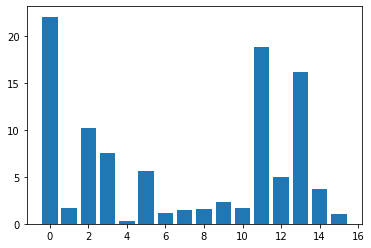

In [206]:
plt.bar([0,1,2,3,4,5,6,7,8,9, 10, 11,12,13,14, 15], model.get_feature_importance())
plt.show()

In [207]:
preds = model.predict(eval_data)
df_merged_w_preds = df_merged['2019-11':].copy()
df_merged_w_preds['diff_p'] = pd.Series(preds, index=df_merged_w_preds.index)
df_merged_w_preds['error'] = abs(df_merged_w_preds['diff'] - df_merged_w_preds['diff_p'])
df_merged_w_preds

,T,T_a,Ff,N,Nh,Cl,Po,U,Ch,Cm,...,diff,abs_diff,T_kal,T_sher,T_sar,three_mean,diff_3,abs_diff_3,diff_p,error
2019-11-01 00:00:00,2.1,2.0,3.0,100.0,100.0,7,738.5,85.0,NaN,"Высококучевые просвечивающие, полосами, либо о...",...,0.1,0.1,1.3,1.4,1.0,1.233333,0.866667,0.866667,-0.070545,0.170545
2019-11-01 03:00:00,2.6,3.0,3.0,100.0,100.0,7,737.8,85.0,NaN,"Высококучевые просвечивающие, полосами, либо о...",...,-0.4,0.4,3.3,5.4,1.9,3.533333,-0.933333,0.933333,-0.170733,0.229267
2019-11-01 06:00:00,4.2,4.0,2.0,100.0,100.0,0,738.4,92.0,NaN,NaN,...,0.2,0.2,10.7,4.7,2.7,6.033333,-1.833333,1.833333,-0.056077,0.256077
2019-11-01 09:00:00,3.2,2.0,6.0,75.0,75.0,0,739.6,63.0,"Перистых, перисто-кучевых или перисто-слоистых...","Высококучевых, высокослоистых или слоисто-дожд...",...,1.2,1.2,10.7,1.2,3.1,5.000000,-1.800000,1.800000,0.236924,0.963076
2019-11-01 12:00:00,1.8,2.0,5.0,75.0,75.0,0,740.8,68.0,"Перистых, перисто-кучевых или перисто-слоистых...","Высококучевых, высокослоистых или слоисто-дожд...",...,-0.2,0.2,2.1,1.7,2.1,1.966667,-0.166667,0.166667,0.238215,0.438215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-28 09:00:00,-25.8,-24.0,3.0,100.0,100.0,7,755.8,79.0,NaN,Высокослоистые просвечивающие.,...,-1.8,1.8,-26.5,-22.8,-27.2,-25.500000,-0.300000,0.300000,-1.062748,0.737252
2021-02-28 12:00:00,-20.7,-20.0,4.0,100.0,0.0,7,753.9,81.0,Перистые (часто в виде полос) и перисто-слоист...,"Высококучевых, высокослоистых или слоисто-дожд...",...,-0.7,0.7,-20.9,-20.4,-21.1,-20.800000,0.100000,0.100000,-0.574564,0.125436
2021-02-28 15:00:00,-17.2,-17.0,5.0,100.0,40.0,7,751.9,80.0,Перистые (часто в виде полос) и перисто-слоист...,Высокослоистые непросвечивающие или слоисто-до...,...,-0.2,0.2,-17.3,-16.4,-16.4,-16.700000,-0.500000,0.500000,-0.851280,0.651280
2021-02-28 18:00:00,-17.3,-17.0,6.0,100.0,100.0,0,750.1,82.0,NaN,NaN,...,-0.3,0.3,-17.6,-16.0,-16.9,-16.833333,-0.466667,0.466667,-0.822853,0.522853


In [210]:
df_merged_w_preds['error'].mean()

0.6281652631475646

In [209]:
abs(df_merged_w_preds['diff']).mean()

0.7918516513264758

In [213]:
df_merged_w_preds['error'][df_merged_w_preds['abs_diff'] > 2].mean()

1.8551719922146346

In [214]:
abs(df_merged_w_preds['diff'][df_merged_w_preds['abs_diff'] > 2]).mean()

2.827210884353741

In [215]:
abs(df_merged_w_preds['diff'][df_merged_w_preds['abs_diff'] > 2]).var()

0.7432270990588015

Возьмем выборку с большой разностью:

In [217]:
#
# try catboost reg
train_data = df_merged_c['2012':'2019-03'][df_merged_c['abs_diff'] > 1.9]
train_data = train_data.drop(columns=['diff','abs_diff','diff_3','abs_diff_3', 'T_a'])
eval_data = df_merged_c['2019-11':]
eval_data = eval_data.drop(columns=['diff','abs_diff','diff_3','abs_diff_3', 'T_a'])
train_labels = df_merged_c['2012':'2019-03'][df_merged_c['abs_diff'] > 1.9]['diff']

C:\Users\Dima\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dima\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [220]:
model = CatBoostRegressor(iterations=1000, 
                           task_type="GPU",
                           devices='0:1')

model.fit(train_data,
          train_labels,
          verbose=False,
         cat_features=cat_cols)

In [221]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 832 entries, 2012-11-01 00:00:00 to 2019-02-28 15:00:00
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   T           832 non-null    float64
 1   Ff          832 non-null    float64
 2   N           832 non-null    float64
 3   Nh          454 non-null    float64
 4   Cl          832 non-null    int32  
 5   Po          832 non-null    float64
 6   U           831 non-null    float64
 7   Ch          832 non-null    object 
 8   Cm          832 non-null    object 
 9   H           832 non-null    object 
 10  RRR         832 non-null    object 
 11  DD_         832 non-null    object 
 12  T_kal       831 non-null    float64
 13  T_sher      832 non-null    float64
 14  T_sar       637 non-null    float64
 15  three_mean  636 non-null    float64
dtypes: float64(10), int32(1), object(5)
memory usage: 107.2+ KB


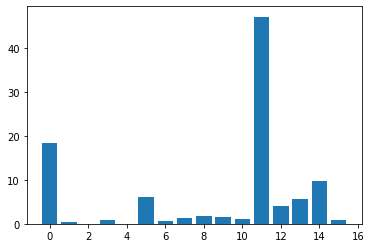

In [223]:
plt.bar([0,1,2,3,4,5,6,7,8,9, 10, 11, 12, 13, 14, 15],model.get_feature_importance())
plt.show()

In [224]:
preds = model.predict(eval_data)
df_merged_w_preds = df_merged['2019-11':].copy()
df_merged_w_preds['diff_p'] = pd.Series(preds, index=df_merged_w_preds.index)
df_merged_w_preds['error'] = abs(df_merged_w_preds['diff'] - df_merged_w_preds['diff_p'])
df_merged_w_preds

,T,T_a,Ff,N,Nh,Cl,Po,U,Ch,Cm,...,diff,abs_diff,T_kal,T_sher,T_sar,three_mean,diff_3,abs_diff_3,diff_p,error
2019-11-01 00:00:00,2.1,2.0,3.0,100.0,100.0,7,738.5,85.0,NaN,"Высококучевые просвечивающие, полосами, либо о...",...,0.1,0.1,1.3,1.4,1.0,1.233333,0.866667,0.866667,0.927711,0.827711
2019-11-01 03:00:00,2.6,3.0,3.0,100.0,100.0,7,737.8,85.0,NaN,"Высококучевые просвечивающие, полосами, либо о...",...,-0.4,0.4,3.3,5.4,1.9,3.533333,-0.933333,0.933333,0.927711,1.327711
2019-11-01 06:00:00,4.2,4.0,2.0,100.0,100.0,0,738.4,92.0,NaN,NaN,...,0.2,0.2,10.7,4.7,2.7,6.033333,-1.833333,1.833333,1.698072,1.498072
2019-11-01 09:00:00,3.2,2.0,6.0,75.0,75.0,0,739.6,63.0,"Перистых, перисто-кучевых или перисто-слоистых...","Высококучевых, высокослоистых или слоисто-дожд...",...,1.2,1.2,10.7,1.2,3.1,5.000000,-1.800000,1.800000,1.557771,0.357771
2019-11-01 12:00:00,1.8,2.0,5.0,75.0,75.0,0,740.8,68.0,"Перистых, перисто-кучевых или перисто-слоистых...","Высококучевых, высокослоистых или слоисто-дожд...",...,-0.2,0.2,2.1,1.7,2.1,1.966667,-0.166667,0.166667,2.558409,2.758409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-28 09:00:00,-25.8,-24.0,3.0,100.0,100.0,7,755.8,79.0,NaN,Высокослоистые просвечивающие.,...,-1.8,1.8,-26.5,-22.8,-27.2,-25.500000,-0.300000,0.300000,-2.989754,1.189754
2021-02-28 12:00:00,-20.7,-20.0,4.0,100.0,0.0,7,753.9,81.0,Перистые (часто в виде полос) и перисто-слоист...,"Высококучевых, высокослоистых или слоисто-дожд...",...,-0.7,0.7,-20.9,-20.4,-21.1,-20.800000,0.100000,0.100000,-1.675156,0.975156
2021-02-28 15:00:00,-17.2,-17.0,5.0,100.0,40.0,7,751.9,80.0,Перистые (часто в виде полос) и перисто-слоист...,Высокослоистые непросвечивающие или слоисто-до...,...,-0.2,0.2,-17.3,-16.4,-16.4,-16.700000,-0.500000,0.500000,-3.680479,3.480479
2021-02-28 18:00:00,-17.3,-17.0,6.0,100.0,100.0,0,750.1,82.0,NaN,NaN,...,-0.3,0.3,-17.6,-16.0,-16.9,-16.833333,-0.466667,0.466667,-4.590009,4.290009


In [230]:
df_merged_w_preds['error'][df_merged_w_preds['abs_diff'] > 2].mean()

1.2220123393697555

### Кластеризация

In [255]:
df_merged_cluster = df_merged[['T', 'Ff', 'N', 'Nh', 'Cl', 'DD_']]

In [256]:
df_merged_cluster = conv_wind_label(df_merged_cluster, col_name='DD_')

In [257]:
df_merged_cluster['Nh'] = df_merged_cluster['Nh'].fillna(0)
df_merged_cluster['N'] = df_merged_cluster['Nh'].fillna(0)

In [258]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=3, min_samples=4).fit(df_merged_cluster)

In [259]:
df_merged_cluster['cluster'] = pd.Series(clustering.labels_, index=df_merged_cluster.index)

In [260]:
# df_merged_cluster.cluster.value_counts()
# df_merged_cluster.groupby('DD_', as_index=False)['diff', 'abs_diff'].mean().sort_values('abs_diff', ascending=False)

KeyError: "Columns not found: 'diff', 'abs_diff'"

In [262]:
df_merged_9 = df_merged.copy()
df_merged_9['cluster'] = df_merged_cluster['cluster']

In [269]:
df_merged_9[df_merged_9['cluster'] == 2].groupby('DD_', as_index=False)['diff', 'abs_diff'].mean().sort_values('abs_diff', ascending=False)

,DD_,diff,abs_diff
0,Calm,-0.080000,1.360000
2,North,-0.693333,1.213333
4,West,0.636000,0.908000
3,South,0.577778,0.851852
1,East,-0.611111,0.655556
